제곱항, 세제곱항 등을 추가하면 선형회귀 모델에 도움이 많이 됨!

log, exp, sin, cos 등의 수학 함수들을 특성에 적용하는 것도 도움이 많이 될 때가 있다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 여기는 다시는 보지 마세요.. ㅇㅋ?
rnd = np.random.RandomState(0)

X_original = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_original))
y = np.dot(X_original, w)

print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [ ]:
print("특성 출현 횟수 : \n{}".format(np.bincount(X[:, 0])))

특성 출현 횟수 : 
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


In [ ]:
plt.rcParams['figure.figsize']=(20, 8)

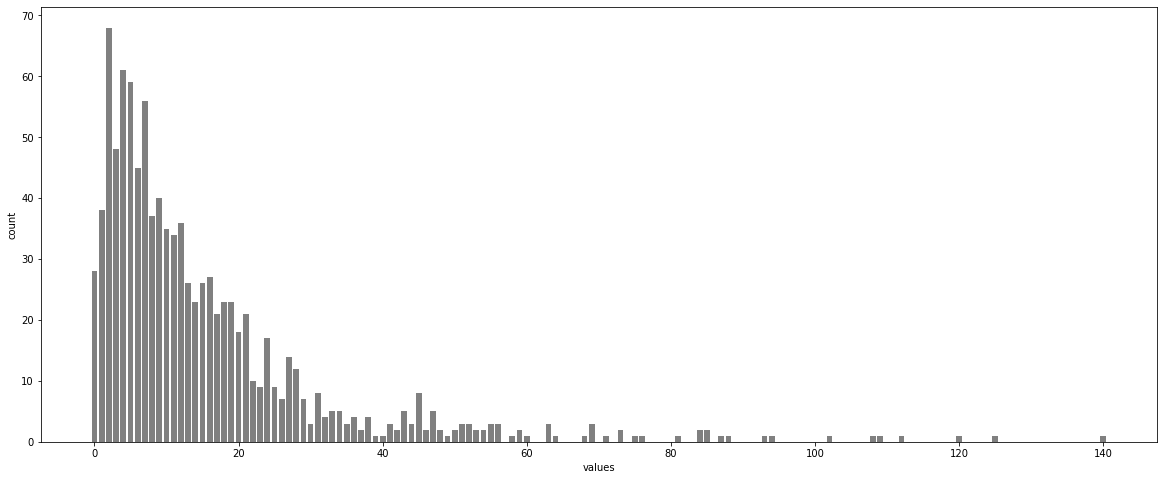

In [ ]:
# 각 정수당 등장한 횟수를 bar로 그려봄( 히스토그램 )
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='gray')
plt.xlabel("values")
plt.ylabel("count")
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0
)

score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Ridge Test Score : {:.3f}".format(score))

Ridge Test Score : 0.622


값에 대한 빈도수의 격차를 줄여서 훈련

In [ ]:
X_train_log = np.log(X_train + 1)
X_test_log  = np.log(X_test + 1)

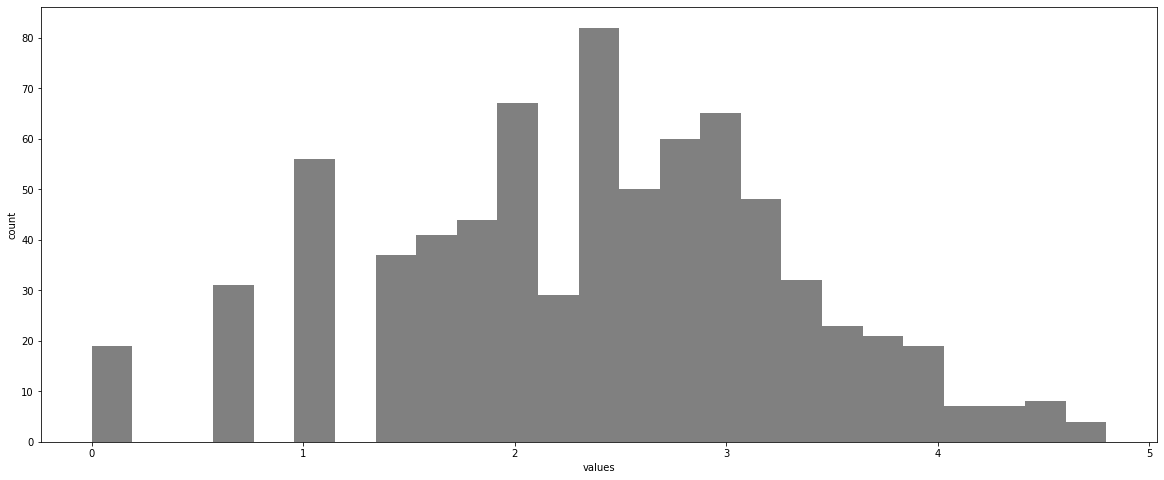

In [ ]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.xlabel("values")
plt.ylabel("count")
plt.show()

In [ ]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.875


1. 모든 상황에서 이러한 방법이 맞는 것은 아니다. - 어떻게 보면 **편법**
2. 지금은 모든 특성이 같은 속성을 가지고 있었음 ( 앞쪽에 값이 많이 몰려있는 형태 )
3. 상황에 맞춰서 일부 특성만 변환하는 방법을 사용하기도 한다.

* 트리 모델에서는 이러한 변형이 **불필요**
* 선형 모델에서는 필수적으로 해야 할 수도 있다.

가끔 y를 변환해야 할 경우도 있다. `y` -> `np.log(y+1)`. 카운트 같은 것들을 셀 때.
* log 씌워서 훈련 시키고
* exp로 결과물 복구 시키기(prediction 후)